# Guía 3: Condiciones de contorno en las fronteras

## Ejercicios de programación

1. Escriba un código que permita resolver numéricamente la ecuación diferencial $$u''(x) = -\frac{\pi^2}{4} (u(x) + 1)$$ en el intervalo $x = [0, 1]$ y teniendo en cuenta las condiciones de contorno $u(0) = 0$ y $u(1) = 1$.

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          9.58e-04       0.00e+00           5              8       
       2          3.94e-05       0.00e+00          13             12       
       3          5.20e-06       0.00e+00          25             24       
       4          6.83e-07       0.00e+00          49              0       
Solved in 4 iterations, number of nodes 49. 
Maximum relative residual: 6.83e-07 
Maximum boundary residual: 0.00e+00


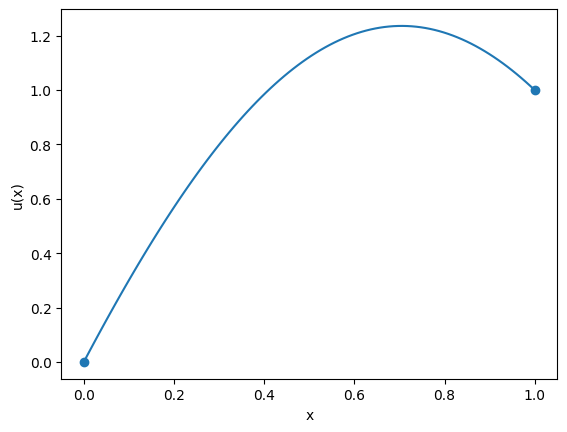

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def fun(x, y):
    return np.vstack((y[1], -np.pi**2 / 4 * (y[0] + 1)))

def bc(ya, yb):
    return np.array([ya[0], yb[0] - 1])

x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))

res = solve_bvp(fun, bc, x, y, tol=1e-6, verbose=2)

x_plot = np.linspace(0, 1, 100)

plt.scatter([0, 1], [0, 1])
plt.plot(x_plot, res.sol(x_plot)[0])
plt.xlabel("x")
plt.ylabel("u(x)")
plt.show()

2. Escriba un código que permita resolver numéricamente la ecuación diferencial $$u''(x) = -k^2 u(x)$$ en el intervalo $x = [0, 1]$ y teniendo en cuenta las condiciones de contorno $u(0) = 0$ y $u(1) = 0$.

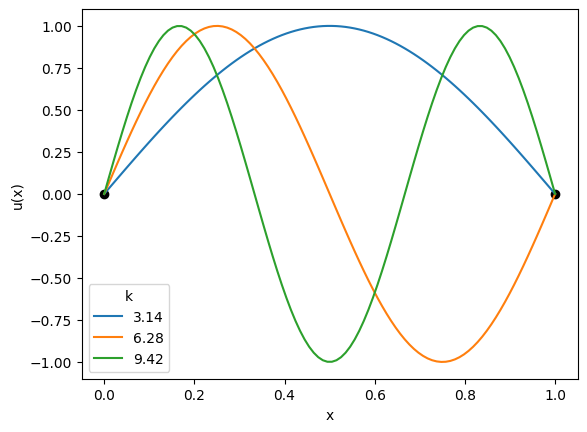

In [2]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def fun(x, y, k):
    return np.vstack((y[1], -k[0]**2 * y[0]))

def bc(ya, yb, k):
    return np.array([ya[0], yb[0], ya[1] - k[0]])

x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))
y[0, 1] = 1
y[0, -1] = -1

x_plot = np.linspace(0, 1, 100)
plt.scatter([0, 1], [0, 0], color="k")
for k in [3.1, 7, 10]:
    sol = solve_bvp(fun, bc, x, y, p=[k], tol=1e-6)
    plt.plot(x_plot, sol.sol(x_plot)[0], label=f"{sol.p[0]:.2f}")

plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend(title=r"k")
plt.show()